In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *

In [2]:
def U_parallel_RC(t,I,R,C):
    # calculate time evolution of parallel RC circuit
    # discrete solution of the differential equation
    
    # time step
    dt = t[1]-t[0]
    
    U = np.zeros(len(t))
    last_U = 0
    
    for i in range(len(t)):   
        U[i] = 1/(1/R+C/dt) * ( I[i] + C/dt*last_U) 
        last_U = U[i]
    
    return U

In [3]:
t = np.arange(0,100e-9,10e-12) # time goes from 0 to 100 ns in steps of 10 ps


Text(0.5,1,'photon signal from scintillator')

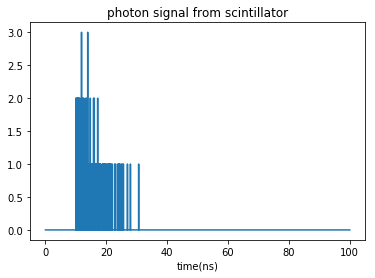

In [4]:
photon_signal = np.zeros(len(t))


N_phot = 200 # number of photons produced in the scintillator due to radiation

# Scintillator gets excited. Excitation decays according to an exponential distribution

tau_scint = 5e-9 # scintillator decay time, here 5 ns

photon_toa = np.random.exponential(tau_scint,N_phot) # draw from an exponential random number generator

photon_toa += 10e-9 # signal comes after 10 ns, just an offset


dt = t[1]-t[0]
# fill a histogram
for toa in photon_toa:
    index = int(toa/dt)
    photon_signal[index] += 1
    
plt.plot(t*1e9,photon_signal)
plt.xlabel("time(ns)")
plt.title("photon signal from scintillator")

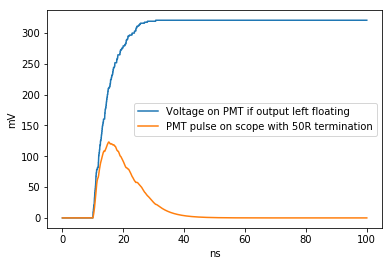

In [5]:

R = 50      # the input impedance of the oscilloscope
C = 100e-12 # realistic guess on anode capacitance of a medium sized PMT

PMT_gain = 1e6 # guess
Qe = 1.602e-19 # electron charge

# each photon makes Qe * PMT_gain of electrical charge
I_signal = photon_signal * Qe * PMT_gain / dt


V_open = integrate_dt(t,I_signal)/C


V_signal = U_parallel_RC(t,I_signal,R,C)




scope_BW = 500e6 # let's say you have 500 MHz analog BW 

scope_signal = RC_filter(t,V_signal,1,1/(2*np.pi*scope_BW))


plt.plot(t*1e9,V_open*1e3,label="Voltage on PMT if output left floating")
plt.plot(t*1e9,scope_signal*1e3,label="PMT pulse on scope with 50R termination")
#plt.xlim(-10,200)
plt.xlabel("ns")
plt.ylabel("mV")
plt.legend()
plt.show()